<a href="https://colab.research.google.com/github/VeerVikramSingh/ML/blob/master/PrincipalComponentAnalysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter

In [2]:
value=pd.read_csv("https://raw.githubusercontent.com/insaid2018/pca-file/master/train.csv")
value.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,11d86fa6a,77c9823f2,8d6c2a0b2,4681de4fd,adf119b9a,cff75dd09,96f83a237,b8a716ebf,6c7a4567c,4fcfd2b4d,f3b9c0b95,71cebf11c,d966ac62c,68b647452,c88d108c9,ff7b471cd,d5308d8bc,0d866c3d7,bc3f77679,bd8f989f1,0eff5bf95,22ed6dba3,92b13ebba,c330f1a67,233c7c17c,2cb4d123e,eeac16933,87ffda550,...,969caa87a,00302fe51,1189ee335,ca04a07ca,f6f15ffa5,841704460,ea5ed6ff7,b1bb8eac3,8132d18b8,c24ea6548,cdfc2b069,2a879b4f7,6b119d8ce,98dea9e42,9f2471031,88458cb21,f40da20f4,7ad6b38bd,c901e7df1,8f55955dc,85dcc913d,5ca0b9b0c,eab8abf7a,8d8bffbae,2a1f6c7f9,9437d8b64,5831f4c76,2e84e09c5,d45fd5508,a165f5761,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,1300000.0,...,0,0,1100000.0,0,0,0,0.0,0.0,14800000,0.0,1200000.0,0.0,0.0,0,0,0,0,0.0,4000000,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,2200000.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,2000000.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0


In [3]:
value.shape

(4459, 4993)

In [4]:
value.columns

Index(['ID', 'target', '48df886f9', '0deb4b6a8', '34b15f335', 'a8cb14b00',
       '2f0771a37', '30347e683', 'd08d1fbe3', '6ee66e115',
       ...
       '3ecc09859', '9281abeea', '8675bec0b', '3a13ed79a', 'f677d4d13',
       '71b203550', '137efaa80', 'fb36b89d9', '7e293fbaf', '9fc776466'],
      dtype='object', length=4993)

In [5]:
value.describe()

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,11d86fa6a,77c9823f2,8d6c2a0b2,4681de4fd,adf119b9a,cff75dd09,96f83a237,b8a716ebf,6c7a4567c,4fcfd2b4d,f3b9c0b95,71cebf11c,d966ac62c,68b647452,c88d108c9,ff7b471cd,d5308d8bc,0d866c3d7,bc3f77679,bd8f989f1,0eff5bf95,22ed6dba3,92b13ebba,c330f1a67,233c7c17c,2cb4d123e,eeac16933,87ffda550,822e49b95,...,969caa87a,00302fe51,1189ee335,ca04a07ca,f6f15ffa5,841704460,ea5ed6ff7,b1bb8eac3,8132d18b8,c24ea6548,cdfc2b069,2a879b4f7,6b119d8ce,98dea9e42,9f2471031,88458cb21,f40da20f4,7ad6b38bd,c901e7df1,8f55955dc,85dcc913d,5ca0b9b0c,eab8abf7a,8d8bffbae,2a1f6c7f9,9437d8b64,5831f4c76,2e84e09c5,d45fd5508,a165f5761,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
count,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.000000,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.0,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.0,4.459000e+03,4.459000e+03,4459.0,4.459000e+03,4.459000e+03,...,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.000000,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.000000,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03
mean,5.944923e+06,1.465493e+04,1.390895e+03,2.672245e+04,4.530164e+03,2.640996e+04,3.070811e+04,1.686522e+04,4.669208e+03,2.569407e+06,1.552158e+05,1.950500e+05,8.522090,3.595874e+03,2.258015e+06,2.680843e+05,4.588255e+04,4.451478e+04,3.968961e+05,2.883129e+04,1.940794e+03,4.483841e+05,7.989729e+04,1.548394e+05,1.128254e+05,1.148329e+05,3.377439e+03,0.0,3.794130e+05,1.202247e+05,7.426464e+05,4.994842e+03,1.725258e+06,1.941882e+05,0.0,9.338327e+04,6.296896e+05,0.0,1.249545e+06,1.200042e+06,...,2.412200e+03,3.767589e+05,6.669478e+05,4.281949e+04,6.279435,1.409112e+05,2.364780e+05,7.627485e+05,6.752640e+05,5.428654e+05,7.776979e+05,1.004851e+05,3.825025e+05,2.539583e+03,3.767661e+03,4.153891e+04,7.041224e+04,9.648562e+04,9.751240e+05,2.910967e+04,7.599802e+04,3.588248e+03,1.796016e+05,5.302810e+05,2.377396e+05,1.183135e+06,1.247793e+06,9.867683e+02,6.165015e+04,1.289495e+05,4.676057e+05,4.446239e+05,8.056219e+05,7.812966e+05,143.529939,1.213809e+05,3.573451e+04,3.123741e+05,9.219960e+04,2.279100e+05
std,8.234312e+06,3.893298e+05,6.428302e+04,5.699652e+05,2.359124e+05,1.514730e+06,5.770590e+05,7.512756e+05,1.879449e+05,9.610183e+06,1.587815e+06,2.397372e+06,569.068911,1.245435e+05,1.552298e+07,3.026910e+06,8.140674e+05,1.354504e+06,3.238243e+06,5.705388e+05,2.786022e+04,6.370644e+06,2.846440e+06,2.425794e+06,1.161275e+06,2.747535e+06,1.313839e+05,0.0,3.561409e+06,4.867503e+06,3.799941e+06,1.868664e+05,9.034308e+06,1.481349e+06,0.0,8.547764e+05,6.956380e+06,0.0,7.361173e+06,8.113234e+06,...,1.498586e+05,7.755051e+06,6.261373e+06,5.473370e+05,322.557139,2.052878e+06,1.533062e+06,5.816722e+06,7.444468e+06,4.250172e+06,4.287643e+06,9.150068e+05,2.799848e+06,1.508683e+05,2.515884e+05,1.179500e+06,2.810830e+06,1.114863e+06,9.750283e+06,7.912064e+05,1.206581e+06,2.396080e+05,1.660884e+06,4.497567e+06,4.109065e+06,1.139493e+07,6.878895e+06,6.589219e+04,2.124731e+06,1.335938e+06,4.068038e+06,4.428889e+06,4.513246e+06,6.839451e+06,9584.318507,4.720709e+06,1.614622e+06,4.318501e+06,1.635993e+06,1.811139e+06
min,3.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000

In [6]:
value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4993 entries, ID to 9fc776466
dtypes: float64(1845), int64(3147), object(1)
memory usage: 169.9+ MB


In [8]:
value.dtypes

ID            object
target       float64
48df886f9    float64
0deb4b6a8      int64
34b15f335    float64
              ...   
71b203550      int64
137efaa80      int64
fb36b89d9      int64
7e293fbaf      int64
9fc776466      int64
Length: 4993, dtype: object

In [10]:
value.select_dtypes(include=object).dtypes

ID    object
dtype: object

In [11]:
value.select_dtypes(include=object).dtypes

ID    object
dtype: object

In [12]:
value.isnull().sum()

ID           0
target       0
48df886f9    0
0deb4b6a8    0
34b15f335    0
            ..
71b203550    0
137efaa80    0
fb36b89d9    0
7e293fbaf    0
9fc776466    0
Length: 4993, dtype: int64

In [13]:
value.isnull().sum().any()

False

In [0]:
value=value.drop("ID",axis=1)

In [17]:
value["target"].describe()

count    4.459000e+03
mean     5.944923e+06
std      8.234312e+06
min      3.000000e+04
25%      6.000000e+05
50%      2.260000e+06
75%      8.000000e+06
max      4.000000e+07
Name: target, dtype: float64

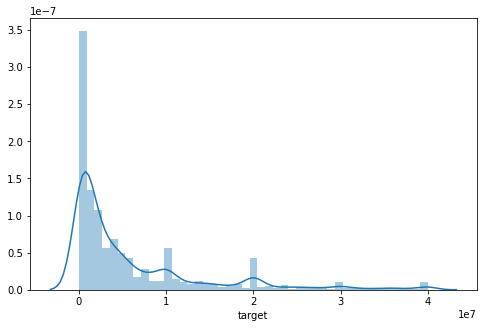

In [18]:
plt.figure(figsize=(8,5))
sns.distplot(value["target"])

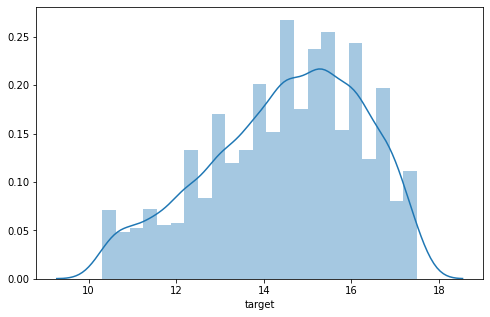

In [23]:
plt.figure(figsize=(8,5))
sns.distplot(np.log1p(value["target"]),kde="false")

In [24]:
np.log1p(value["target"]).describe()

count    4459.000000
mean       14.490239
std         1.750947
min        10.308986
25%        13.304687
50%        14.630876
75%        15.894952
max        17.504390
Name: target, dtype: float64

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, '48df886f9')

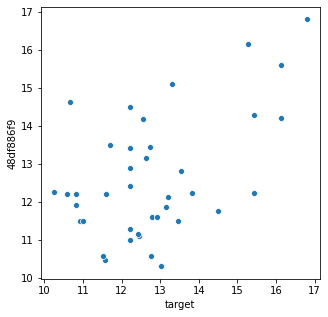

In [26]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=np.log(value["48df886f9"]),y=np.log(value["target"]))
plt.xlabel("target")
plt.ylabel("48df886f9")

In [28]:
value["target"].sort_values(ascending=False)

713     40000000.0
1968    40000000.0
3662    40000000.0
730     40000000.0
3591    40000000.0
           ...    
2974       30000.0
2828       30000.0
3715       30000.0
2749       30000.0
2583       30000.0
Name: target, Length: 4459, dtype: float64

In [31]:
Counter(value["target"]).most_common()[:5]

[(2000000.0, 207),
 (10000000.0, 199),
 (20000000.0, 156),
 (4000000.0, 148),
 (1000000.0, 129)]

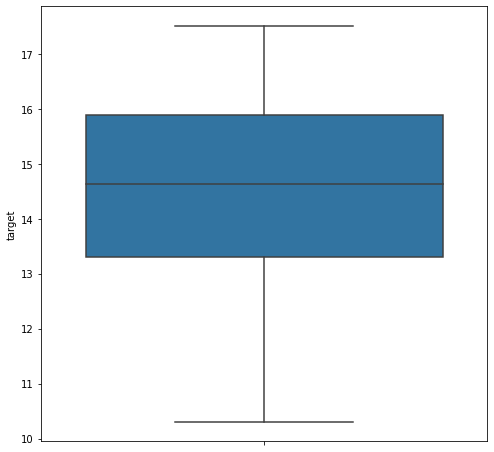

In [34]:
plt.figure(figsize=(8,8))
sns.boxplot(np.log(value["target"]),orient="v")

In [35]:
value.head()

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,11d86fa6a,77c9823f2,8d6c2a0b2,4681de4fd,adf119b9a,cff75dd09,96f83a237,b8a716ebf,6c7a4567c,4fcfd2b4d,f3b9c0b95,71cebf11c,d966ac62c,68b647452,c88d108c9,ff7b471cd,d5308d8bc,0d866c3d7,bc3f77679,bd8f989f1,0eff5bf95,22ed6dba3,92b13ebba,c330f1a67,233c7c17c,2cb4d123e,eeac16933,87ffda550,822e49b95,...,969caa87a,00302fe51,1189ee335,ca04a07ca,f6f15ffa5,841704460,ea5ed6ff7,b1bb8eac3,8132d18b8,c24ea6548,cdfc2b069,2a879b4f7,6b119d8ce,98dea9e42,9f2471031,88458cb21,f40da20f4,7ad6b38bd,c901e7df1,8f55955dc,85dcc913d,5ca0b9b0c,eab8abf7a,8d8bffbae,2a1f6c7f9,9437d8b64,5831f4c76,2e84e09c5,d45fd5508,a165f5761,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,38000000.0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,1300000.0,0.0,...,0,0,1100000.0,0,0,0,0.0,0.0,14800000,0.0,1200000.0,0.0,0.0,0,0,0,0,0.0,4000000,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
1,600000.0,0.0,0,0.0,0,0,0,0,0,2200000.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
2,10000000.0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
3,2000000.0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
4,14400000.0,0.0,0,0.0,0,0,0,0,0,2000000.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0


In [36]:
value.columns

Index(['target', '48df886f9', '0deb4b6a8', '34b15f335', 'a8cb14b00',
       '2f0771a37', '30347e683', 'd08d1fbe3', '6ee66e115', '20aa07010',
       ...
       '3ecc09859', '9281abeea', '8675bec0b', '3a13ed79a', 'f677d4d13',
       '71b203550', '137efaa80', 'fb36b89d9', '7e293fbaf', '9fc776466'],
      dtype='object', length=4992)

In [39]:
drop_col=[]
for cols in value.columns:
  if np.std(value[cols])==0:
    drop_col.append(cols)
print(len(drop_col))

256


In [0]:
value.drop(drop_col,axis=1,inplace=True)

In [41]:
value.columns

Index(['target', '48df886f9', '0deb4b6a8', '34b15f335', 'a8cb14b00',
       '2f0771a37', '30347e683', 'd08d1fbe3', '6ee66e115', '20aa07010',
       ...
       '3ecc09859', '9281abeea', '8675bec0b', '3a13ed79a', 'f677d4d13',
       '71b203550', '137efaa80', 'fb36b89d9', '7e293fbaf', '9fc776466'],
      dtype='object', length=4736)

In [0]:
x=value.loc[:,value.columns!="target"]
y=np.log(value.loc[:,value.columns=="target"])

In [43]:
x.head()

,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,11d86fa6a,77c9823f2,8d6c2a0b2,4681de4fd,adf119b9a,cff75dd09,96f83a237,b8a716ebf,6c7a4567c,4fcfd2b4d,f3b9c0b95,71cebf11c,d966ac62c,68b647452,c88d108c9,ff7b471cd,0d866c3d7,bc3f77679,bd8f989f1,0eff5bf95,22ed6dba3,92b13ebba,233c7c17c,2cb4d123e,87ffda550,822e49b95,316b978cd,d04e16aed,5d5c5ce6d,ec863cb52,...,969caa87a,00302fe51,1189ee335,ca04a07ca,f6f15ffa5,841704460,ea5ed6ff7,b1bb8eac3,8132d18b8,c24ea6548,cdfc2b069,2a879b4f7,6b119d8ce,98dea9e42,9f2471031,88458cb21,f40da20f4,7ad6b38bd,c901e7df1,8f55955dc,85dcc913d,5ca0b9b0c,eab8abf7a,8d8bffbae,2a1f6c7f9,9437d8b64,5831f4c76,2e84e09c5,d45fd5508,a165f5761,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0.0,0,0.0,0.0,0.0,0,1300000.0,0.0,0,0.0,0,0,...,0,0,1100000.0,0,0,0,0.0,0.0,14800000,0.0,1200000.0,0.0,0.0,0,0,0,0,0.0,4000000,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
1,0.0,0,0.0,0,0,0,0,0,2200000.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
4,0.0,0,0.0,0,0,0,0,0,2000000.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0


In [44]:
y.head()

,target
0,17.453097
1,13.304685
2,16.118096
3,14.508658
4,16.482739


In [0]:
from sklearn.preprocessing import StandardScaler


In [0]:
x_sc=StandardScaler().fit_transform(x)

In [48]:
x_sc[:5]

array([[-0.03764565, -0.02163947, -0.04688961, ..., -0.07234203,
        -0.05636327, -0.12585201],
       [-0.03764565, -0.02163947, -0.04688961, ..., -0.07234203,
        -0.05636327, -0.12585201],
       [-0.03764565, -0.02163947, -0.04688961, ..., -0.07234203,
        -0.05636327, -0.12585201],
       [-0.03764565, -0.02163947, -0.04688961, ..., -0.07234203,
        -0.05636327, -0.12585201],
       [-0.03764565, -0.02163947, -0.04688961, ..., -0.07234203,
        -0.05636327, -0.12585201]])

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [51]:
print(x_train.shape)
print(y_train.shape)

(3567, 4735)
(3567, 1)


In [52]:
x.shape

(4459, 4735)

In [0]:
import time
from sklearn.ensemble import RandomForestRegressor

In [57]:
import time
from sklearn.ensemble import RandomForestRegressor
# base model - no parameters 
rfc = RandomForestRegressor(random_state =0)
start_time = time.time()
rfc.fit(x_train,y_train)
end_time = time.time()
time1 = end_time-start_time
print(time1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


246.7430522441864


In [0]:
predictions=rfc.predict(x_test)

In [0]:
from sklearn import metrics

In [0]:
rmse=np.sqrt(metrics.mean_squared_error(y_test,predictions))

In [61]:
print(rmse)

1.396045630298015


In [62]:
rmse=np.sqrt(metrics.mean_squared_error(y_test,predictions))
print(rmse)

1.396045630298015


In [0]:
from sklearn.decomposition import PCA

In [66]:
pca=PCA(0.95).fit(x)
x.shape

(4459, 4735)

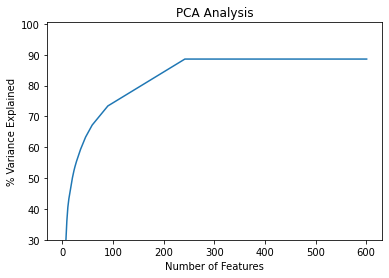

In [67]:
# use this code block as a standard template to decide n_component value or the valu of N which is the number you want to reduce to! 
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [0]:
pca1=PCA(0.95).fit(x_sc)

In [69]:
x_sc.shape

(4459, 4735)

In [70]:
pca=PCA(n_components=180,random_state=0)
x_pca=pca.fit_transform(x)
x_pca.shape

(4459, 180)

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)
rf=RandomForestRegressor()
TIME=time.time()
rf.fit(x_train,y_train)
TIME1=time.time()
print(TIME1-TIME)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


228.68815302848816


In [73]:
pd.DataFrame(x_pca).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179
0,-1.524574e+07,-550024.310821,-363752.280803,-808058.588111,-447139.428099,-340990.474666,-208256.611225,-9.850567e+05,604864.609297,-3.935411e+06,3.330420e+06,-8.059733e+06,-4.376727e+05,1.779573e+06,3.089052e+06,2.574393e+06,5.870157e+05,-2.322175e+06,3.850139e+06,-315229.112515,7.120736e+06,2.523487e+05,-2.562943e+06,-2.535946e+06,-1.131235e+07,-5.633786e+06,-5.725702e+06,4.388835e+06,5.281661e+05,-305608.721677,-123356.403267,-2.664411e+06,7.791309e+06,-4.957170e+06,2.122923e+06,-1.645010e+06,172092.541045,7.082843e+06,-2.611536e+06,-7.866065e+06,...,-3.693938e+06,-3.526317e+06,-8.063416e+06,-6.083399e+06,6.471279e+05,-4.465296e+05,-8.564644e+06,-7.809469e+06,-5.128298e+06,-6.788521e+06,1.670872e+06,-4.057525e+06,1.296452e+06,-8.466078e+06,-4.174846e+06,-429911.102837,8.902344e+05,-3.577220e+06,4.799073e+06,1.982665e+06,-7.106367e+05,-1.789740e+06,-8.195583e+05,-1.889801e+06,-3.859457e+06,1.770965e+06,7.118136e+05,1.234424e+06,3.058522e+06,6.984369e+05,3.696304e+06,1.869748e+06,-1.464907e+06,3.965894e+06,2.921681e+06,5.359785e+06,-1.758888e+06,6.171688e+06,-2.241762e+06,-2.114920e+05
1,-2.147430e+07,-701423.011808,-399388.078518,-856116.011324,-483373.766698,-302694.767291,-271832.664971,-1.014654e+06,586355.275384,-3.676124e+06,-1.020773e+07,-9.389358e+06,-6.042137e+05,1.083884e+06,2.849359e+05,-8.811374e+05,-1.227677e+06,-3.884800e+05,-6.933153e+05,340359.297209,7.788640e+06,6.834683e+06,-2.657261e+06,-2.099293e+06,-6.569235e+06,2.597870e+06,-3.427620e+06,3.622710e+06,4.887316e+06,-968055.363396,836532.175690,-1.263976e+06,4.394668e+06,3.608923e+05,-1.787436e+06,1.252760e+06,167753.577489,-4.979863e+06,-1.512519e+06,-5.260537e+06,...,-4.312721e+06,-3.723823e+06,3.226702e+06,4.202515e+06,5.200653e+05,-5.673819e+05,-2.953829e+06,-3.503363e+05,2.938534e+06,1.676212e+05,-1.596129e+06,3.887556e+06,-2.417955e+06,1.291786e+06,6.860411e+05,277677.690459,2.083631e+06,-3.919517e+06,-3.484130e+06,-6.261976e+05,2.792337e+05,7.091760e+05,-1.403525e+05,-1.141618e+06,-2.542625e+06,9.356218e+05,-2.636217e+06,1.185633e+06,2.445132e+06,-2.486531e+06,3.269728e+06,8.467628e+04,-2.228443e+05,1.716841e+06,-1.178359e+06,-1.349852e+06,3.993761e+05,-4.521069e+06,3.673255e+05,4.237596e+05
2,-2.907118e+07,-749183.600782,-471247.688954,-936492.885157,-487558.330377,-330420.156054,-208507.863612,-1.015635e+06,595208.570102,-3.767340e+06,-7.994092e+06,-1.157841e+07,-1.445128e+06,4.049109e+06,1.804778e+05,-4.243886e+05,2.744069e+05,-7.603099e+03,-1.097599e+05,-75781.045910,9.494579e+05,2.226326e+06,2.746317e+06,1.863375e+06,-1.822192e+06,-6.202262e+05,-5.855336e+05,-5.472958e+04,-1.121243e+06,21150.172620,-593415.847205,-2.236334e+06,2.762416e+06,7.924669e+05,-1.822795e+06,6.740312e+04,449020.305388,-1.054903e+06,6.941813e+05,5.230581e+05,...,1.615943e+03,-1.475461e+06,-1.150377e+06,-9.476803e+05,6.594742e+05,1.591899e+05,5.292553e+05,1.292577e+06,8.322107e+05,2.395600e+05,-1.974604e+06,-1.874382e+05,-1.131950e+05,-1.771605e+06,1.848990e+06,-738584.834910,2.460941e+05,-1.428548e+06,1.175866e+06,1.281353e+06,1.561788e+05,1.900567e+06,-1.251601e+06,1.259840e+06,5.418253e+05,5.253088e+04,-4.731176e+05,-5.025148e+05,6.263863e+05,-4.019783e+05,3.234877e+05,5.134662e+05,-2.295671e+05,8.163975e+05,1.225097e+06,7.983030e+05,-2.110360e+06,5.161035e+05,7.868534e+05,8.757032e+04
3,-3.082332e+07,-742949.915819,-465265.611660,-943556.947262,-502140.464435,-309660.850659,-257718.933196,-1.079581e+06,543047.499819,-3.655459e+06,-1.047843e+07,-1.136635e+07,-1.816229e+06,5.613847e+06,4.435469e+05,-7.894906e+04,3.280779e+05,-2.233330e+05,-3.184764e+05,309352.791834,1.718196e+06,2.231905e+06,2.698199e+06,2.006287e+06,-1.648134e+06,-5.800438e+05,-4.663170e+05,-4.932980e+05,-9.956642e+05,22705.247556,

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import KernelPCA
from sklearn import metrics
reduction_n = [180, 220, 300]
classifier = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()] # base model 
result = {}
for eachValue in reduction_n:
  #k_pca = kernalPCA(n_components=eachValue, kernel='poly')
  pca = PCA(n_components=eachValue, random_state = 0)
  pca.fit(x)
  x_PCA = pca.transform(x)
  x_train, x_test, y_train, y_test = train_test_split(x_PCA, y, test_size=0.25, random_state=1)
  result[eachValue ] = {} 
  for eachClassifier in classifier: 
    model = eachClassifier
    start_time = time.time()
    model.fit(x_train, y_train)
    end_time = time.time()
    time2 = end_time-start_time
    #print(time2)

    predictions = model.predict(x_test)
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, predictions))
    # print('RMSE for test set is {}'.format(RMSE_test))
    
    result[eachValue ][eachClassifier.__class__.__name__] = [RMSE_test, time2]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [84]:
pd.DataFrame(result)

,180,220,300
LinearRegression,"[2.6222865350092035, 0.04862380027770996]","[3.150151172337426, 0.06115365028381348]","[3.451750929545185, 0.09455013275146484]"
DecisionTreeRegressor,"[2.1650446217751234, 0.8440194129943848]","[2.158248935769624, 1.0786290168762207]","[2.1842358199330456, 1.385103702545166]"
RandomForestRegressor,"[1.5150413727095084, 42.1770761013031]","[1.5253401615814026, 51.644062995910645]","[1.5261757431685288, 70.91293382644653]"


In [85]:
pd.DataFrame(result)

,180,220,300
LinearRegression,"[2.6222865350092035, 0.04862380027770996]","[3.150151172337426, 0.06115365028381348]","[3.451750929545185, 0.09455013275146484]"
DecisionTreeRegressor,"[2.1650446217751234, 0.8440194129943848]","[2.158248935769624, 1.0786290168762207]","[2.1842358199330456, 1.385103702545166]"
RandomForestRegressor,"[1.5150413727095084, 42.1770761013031]","[1.5253401615814026, 51.644062995910645]","[1.5261757431685288, 70.91293382644653]"


In [86]:
print(x_train.shape)
print(x_test.shape)

(3344, 300)
(1115, 300)


In [91]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
time_now=time.time()
rf.fit(x_train,y_train)
time3=time.time()-time_now

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [92]:
time3

69.86154294013977

In [0]:
pred_pca=rf.predict(x_test)


In [0]:
pred_pca_exp=np.expm1(pred_pca)

In [95]:
len(pred_pca)

1115

In [97]:
pred_pca_exp[:20]

array([2571255.22998414, 2026954.25086164, 1475017.85527685,
       2592362.58828733, 1687619.51136142,  730590.85003117,
       1509028.38245466, 5910682.4042665 , 1031984.40639459,
       3695713.52735898, 3412750.97593316, 2860669.54566817,
       3229322.66398943, 2965236.50914208, 3357647.19965939,
       1845911.71928901, 2176106.66399674, 4344814.52085752,
       1743710.56419232, 5277210.02051752])

In [98]:
mae=metrics.mean_absolute_error(y_test,pred_pca_exp)
mse=metrics.mean_squared_error(y_test,pred_pca_exp)
rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_pca_exp))
print(mae)
print(mse)
print(rmse)

2543243.549964745
15187664815370.451
3897135.4627944934


In [99]:
time2/time1

0.28240679594660306

In [100]:
time3/time1

0.28313479267088787

In [101]:
print(time1)
print(time2)
print(time3)

246.7430522441864
69.68191480636597
69.86154294013977


In [102]:
(time2/time1)*100

28.240679594660307